<a href="https://colab.research.google.com/github/hemanthkumar17/Machine-Learning/blob/main/Gradient_And_GradientFreeOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

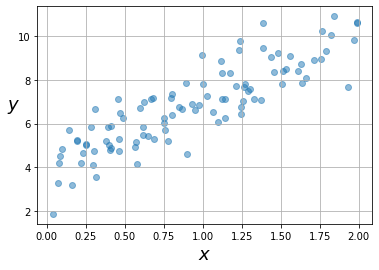

(100, 1) (100, 1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

# mean center
# X -= np.average(X, axis=0)
# y -= np.average(y, axis=0)
# # putting in a ball of 1
# sx = np.max(abs(X),axis = 0)
# sy = np.max(abs(y))
# X /= sx
# y /= sy

plt.figure()
plt.scatter(X,y, alpha =0.5)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.show()

print (X.shape, y.shape)

In [ ]:
'''
X    = Matrix of X with added bias units
y    = Vector of Y
theta=Vector of thetas np.random.randn(j,1)
learning_rate 
iterations = no of iterations

Returns the final theta vector and array of cost history over no of iterations
'''
    
def MSE(theta,X,y):    
    predictions = X.dot(theta)
    cost = (1/2*len(y)) * np.sum(np.square(predictions-y))
    return cost

def loss(theta,X,y):    
    predictions = X.dot(theta)
    loss = np.sum(np.square(predictions-y))
    return loss
    

def getGradient(X,y,theta):
    prediction = np.dot(X,theta)
    gradient = X.T.dot((prediction - y))
    return gradient
    
def getDirection(X,y,theta, sigma=0.4):
    out = np.zeros_like(theta)
    d = theta.shape[0]
    directions = np.random.normal(size = (8,d)) # random 8 direction
    
    fx = loss(theta,X,y)
    for di in directions:
        di = np.array([di]).T
        fxnew = loss(theta+ sigma*di,X,y)
        out += (1.0/8*sigma) * np.sum(fxnew-fx)*di
        
    return out # direction to move
    

def zeroOrder_descent(X,y,theta,learning_rate=0.01,iterations=100):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        # getDirection will give direction without calculating gradient
        direction = getDirection(X,y,theta)
        theta = theta - (1/m)*learning_rate*(direction)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history
        
    
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        gradient = getGradient(X,y,theta)
        theta = theta -(1/m)*learning_rate*(gradient)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history

def stochasticGradientDescent(X, y, theta, learning_rate=0.01, iterations=100):

    m = len(y)
    np.random.seed(0)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        i = np.random.randint(1, m)
        gradient = getGradient(np.expand_dims(X[0], axis=0),np.expand_dims(y[0], axis=0),theta)
        theta = theta - learning_rate*(gradient)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history


def averagedStochasticGradientDescent(X, y, theta, learning_rate=0.01, iterations=100):

    m = len(y)
    np.random.seed(0)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    s = 0
    for it in range(iterations):
        i = np.random.randint(1, m)
        gradient = getGradient(np.expand_dims(X[0], axis=0),np.expand_dims(y[0], axis=0),theta)
        theta = theta - learning_rate*(gradient)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        s += theta_history[it]
        theta = (np.expand_dims(s / (it+1), axis=0)).T
    return theta, cost_history, theta_history

def adam(X,y,theta,learning_rate=0.01,iterations=100, beta1=0.9, beta2=0.999, eps=1e-8):

    n = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    m = 0
    v = 0
    for it in range(iterations):
        gradient = getGradient(X,y,theta)
        m = beta1 * m + (1 - beta1) * gradient
        # print(1 - beta1)
        # print(m / (1 - beta1))
        m_cap = m / (1 - beta1)
        v = beta2 * v + (1 - beta2) * np.square(gradient)
        v_cap = v / (1 - beta2)
        beta1 = beta1 ** (it+1)
        beta2 = beta2 ** (it+1)
        theta = theta - learning_rate * (m_cap) / np.sqrt(v_cap + eps)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history

def nag(X,y,theta,learning_rate=0.01,iterations=100, gamma=0.9):

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    v = 0
    for it in range(iterations):
        gradient = getGradient(X,y,theta - gamma * v)
        v = gamma * v + (1/m)*learning_rate * gradient
        theta = theta - v
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history

def adamW(X,y,theta,learning_rate=0.01,iterations=100, beta1=0.9, beta2=0.999, eps=1e-8, weight_decay=0.01):

    n = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    m = 0
    v = 0
    for it in range(iterations):
        gradient = getGradient(X,y,theta)
        m = beta1 * m + (1 - beta1) * gradient
        m_cap = m / (1 - beta1)
        v = beta2 * v + (1 - beta2) * np.square(gradient)
        v_cap = v / (1 - beta2)
        beta1 = beta1 ** (it+1)
        beta2 = beta2 ** (it+1)
        theta = theta - learning_rate * (m_cap) / np.sqrt(v_cap + eps) - weight_decay * theta
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history

def adabelief(X,y,theta,learning_rate=0.01,iterations=100, beta1=0.9, beta2=0.999, eps=1e-8, weight_decay=0.01):

    n = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    m = 0
    v = 0
    for it in range(iterations):
        gradient = getGradient(X,y,theta)
        m = beta1 * m + (1 - beta1) * gradient
        m_cap = m / (1 - beta1)
        v = beta2 * v + (1 - beta2) * np.square(gradient)
        v_cap = v / (1 - beta2)
        beta1 = beta1 ** (it+1)
        beta2 = beta2 ** (it+1)
        theta = theta - learning_rate * (m_cap) / np.sqrt(v_cap + eps) - weight_decay * theta
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history


Theta:  [[3.78410187]
 [3.26677629]]
Final cost/MSE:  4435.092


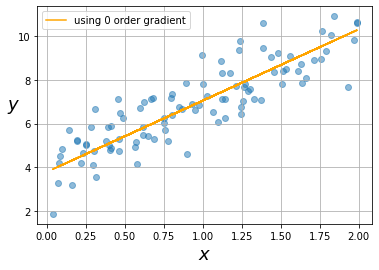

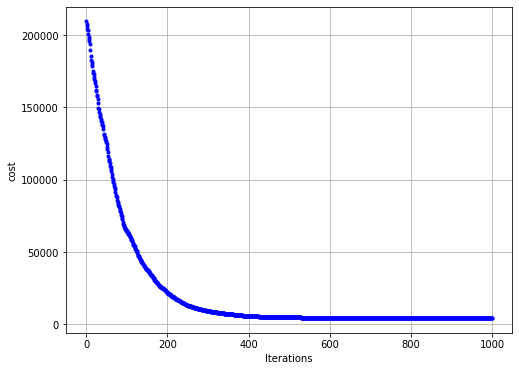

In [ ]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta0,cost_history0,theta_history0 = zeroOrder_descent(X_b,y,theta,lr,n_iter)
print('Theta: ', theta0)
print('Final cost/MSE:  {:0.3f}'.format(cost_history0[-1]))

#plot theta
plt.figure()
plt.scatter(X,y, alpha =0.5)
predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()


fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history0,'b.')

Theta:  [[4.17043185]
 [2.89761333]]
Final cost/MSE:  4372.662


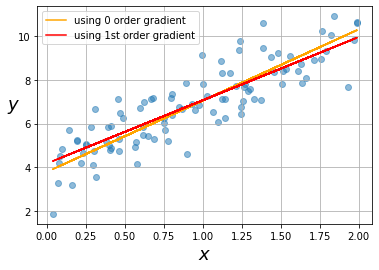

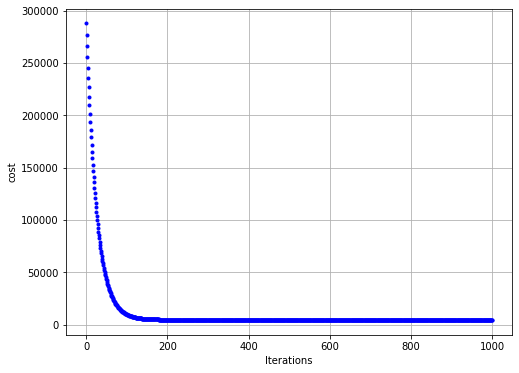

In [ ]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta1,cost_history1,theta_history1 = gradient_descent(X_b,y,theta,lr,n_iter)

print('Theta: ', theta1)
print('Final cost/MSE:  {:0.3f}'.format(cost_history1[-1]))

#plot theta
# plt.figure()
plt.scatter(X,y, alpha =0.5)

# comment next 2 lines if not showing 0 order here
predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")

predy = np.dot(X_b,theta1)
plt.plot(X,predy, "red", label= "using 1st order gradient")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()

fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history1,'b.')

Theta:  [[3.82355599]
 [3.44112882]]
Final cost/MSE:  4754.203


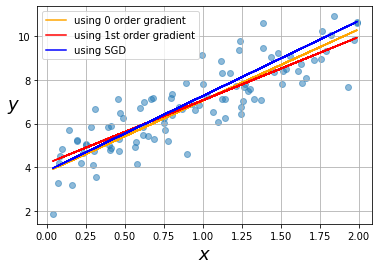

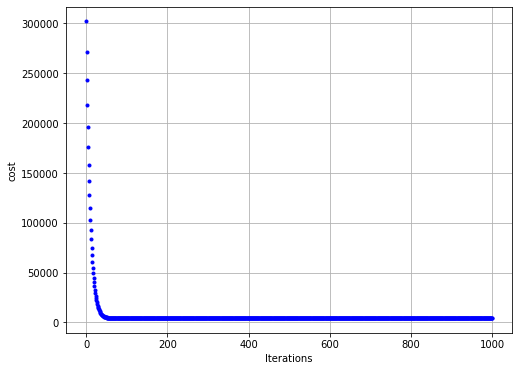

In [ ]:
lr =0.03
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta2,cost_history2,theta_history2 = stochasticGradientDescent(X_b,y,theta,lr,n_iter)

print('Theta: ', theta2)
print('Final cost/MSE:  {:0.3f}'.format(cost_history2[-1]))

#plot theta
# plt.figure()
plt.scatter(X,y, alpha =0.5)

# comment next 2 lines if not showing 0 order here
predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")

predy = np.dot(X_b,theta1)
plt.plot(X,predy, "red", label= "using 1st order gradient")

predy = np.dot(X_b,theta2)
plt.plot(X,predy, "blue", label= "using SGD")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()

fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history2,'b.')

Theta:  [[5.08500808]
 [1.95849362]]
Final cost/MSE:  6013.946


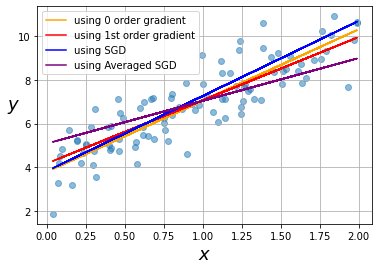

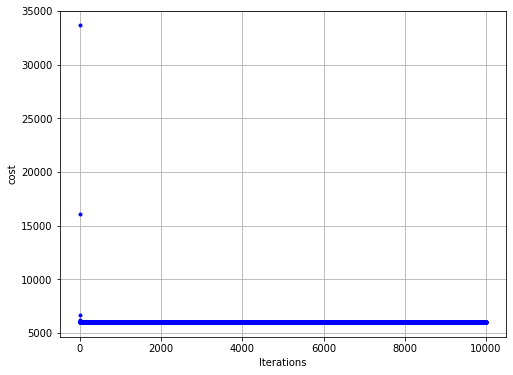

In [ ]:
lr =0.9
n_iter = 10000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta3,cost_history3,theta_history3 = averagedStochasticGradientDescent(X_b,y,theta,lr,n_iter)

print('Theta: ', theta3)
print('Final cost/MSE:  {:0.3f}'.format(cost_history3[-1]))

#plot theta
# plt.figure()
plt.scatter(X,y, alpha =0.5)

# comment next 2 lines if not showing 0 order here
predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")

predy = np.dot(X_b,theta1)
plt.plot(X,predy, "red", label= "using 1st order gradient")

predy = np.dot(X_b,theta2)
plt.plot(X,predy, "blue", label= "using SGD")

predy = np.dot(X_b,theta3)
plt.plot(X,predy, "purple", label= "using Averaged SGD")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()

fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history3,'b.')

Theta:  [[4.03302513]
 [3.02473971]]
Final cost/MSE:  4347.290


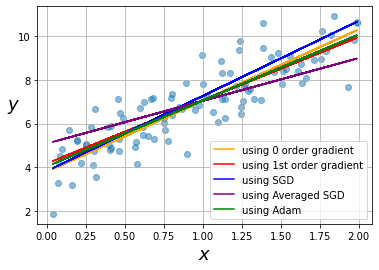

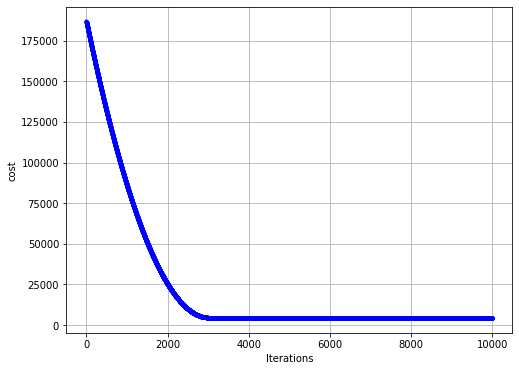

In [ ]:
lr =0.001
n_iter = 10000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta4,cost_history4,theta_history4 = adam(X_b,y,theta,lr,n_iter)

print('Theta: ', theta4)
print('Final cost/MSE:  {:0.3f}'.format(cost_history4[-1]))

#plot theta
# plt.figure()
plt.scatter(X,y, alpha =0.5)

# comment next 2 lines if not showing 0 order here
predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")

predy = np.dot(X_b,theta1)
plt.plot(X,predy, "red", label= "using 1st order gradient")

predy = np.dot(X_b,theta2)
plt.plot(X,predy, "blue", label= "using SGD")

predy = np.dot(X_b,theta3)
plt.plot(X,predy, "purple", label= "using Averaged SGD")

predy = np.dot(X_b,theta4)
plt.plot(X,predy, "green", label= "using Adam")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()

fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history4,'b.')

Theta:  [[3.95997573]
 [2.99512123]]
Final cost/MSE:  4398.780


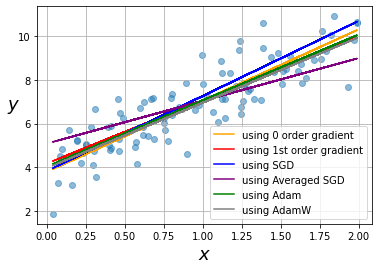

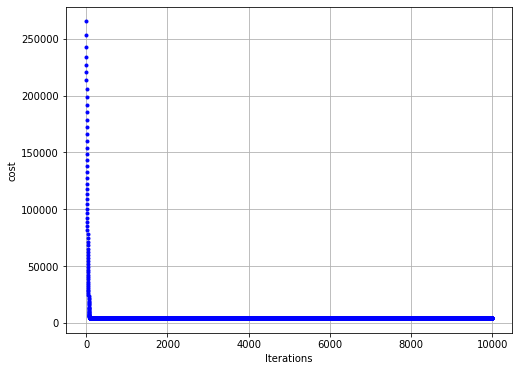

In [ ]:
lr =0.06
n_iter = 10000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta5,cost_history5,theta_history5 = adamW(X_b,y,theta,lr,n_iter)

print('Theta: ', theta5)
print('Final cost/MSE:  {:0.3f}'.format(cost_history5[-1]))

#plot theta
# plt.figure()
plt.scatter(X,y, alpha =0.5)

# comment next 2 lines if not showing 0 order here
predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")

predy = np.dot(X_b,theta1)
plt.plot(X,predy, "red", label= "using 1st order gradient")

predy = np.dot(X_b,theta2)
plt.plot(X,predy, "blue", label= "using SGD")

predy = np.dot(X_b,theta3)
plt.plot(X,predy, "purple", label= "using Averaged SGD")

predy = np.dot(X_b,theta4)
plt.plot(X,predy, "green", label= "using Adam")

predy = np.dot(X_b,theta5)
plt.plot(X,predy, "grey", label= "using AdamW")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()

fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history5,'b.')

Theta:  [[4.03276778]
 [3.02472748]]
Final cost/MSE:  4347.289


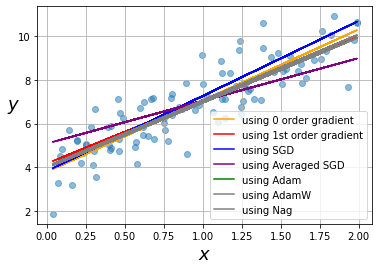

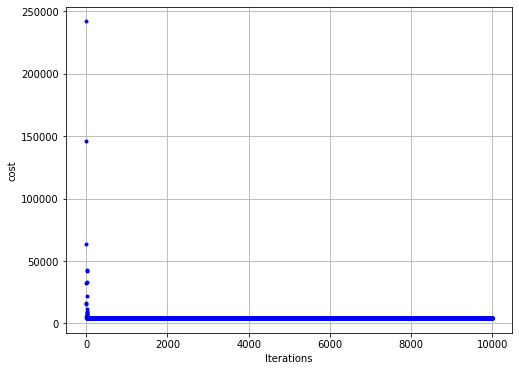

In [ ]:
lr =0.06
n_iter = 10000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta6,cost_history6,theta_history6 = nag(X_b,y,theta,lr,n_iter)

print('Theta: ', theta6)
print('Final cost/MSE:  {:0.3f}'.format(cost_history6[-1]))

#plot theta
# plt.figure()
plt.scatter(X,y, alpha =0.5)

# comment next 2 lines if not showing 0 order here
predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")

predy = np.dot(X_b,theta1)
plt.plot(X,predy, "red", label= "using 1st order gradient")

predy = np.dot(X_b,theta2)
plt.plot(X,predy, "blue", label= "using SGD")

predy = np.dot(X_b,theta3)
plt.plot(X,predy, "purple", label= "using Averaged SGD")

predy = np.dot(X_b,theta4)
plt.plot(X,predy, "green", label= "using Adam")

predy = np.dot(X_b,theta5)
plt.plot(X,predy, "grey", label= "using AdamW")

predy = np.dot(X_b,theta6)
plt.plot(X,predy, "grey", label= "using Nag")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()

fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history6,'b.')

The adam optimizer, its variant adamW, and Nestorov-accelerated gradient descent were performed the best among the optimizers compared here. SGD and averaged-stochastic gradient descent performed a bit worse compared to the methods that use entirety of the gradients.